In [1]:
# To filter the warnings.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd # To Read the datasets.
import numpy as np

# For Data visualization.
# The Finding of trends and correlations in our data by representing it pictorially is called Data visualizations.
import matplotlib.pyplot as plt
import seaborn as sns

# To Load the datasets from sklearn library.
from sklearn import datasets

from sklearn.metrics import confusion_matrix # To Build confusion matrix.
from sklearn.metrics import classification_report # To Get the precision , recall , f1-scores.
from sklearn.preprocessing import LabelEncoder # converting the labels into a numeric form. 
from sklearn.model_selection import cross_val_score # To Evaluate the  Best Model. 

#To calculate the mean intra-cluster distance & the mean nearest-cluster distance. 
from sklearn.metrics import silhouette_score 
import scipy.cluster .hierarchy as sch # To construct Dendrograms

# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler #Transform features by scaling each feature to a given range.

# To split the data into training and testing data
from sklearn.model_selection import train_test_split



# Different types of classifiers I used.
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("somecars.csv")
df.head()

,mpg,cylinders,Displacement,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US
1,31.9,4,89,71,1925,14,1980,Europe
2,17.0,8,302,140,3449,11,1971,US
3,15.0,8,400,150,3761,10,1971,US
4,30.5,4,98,63,2051,17,1978,US


In [4]:
df.shape

(261, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1   cylinders     261 non-null    int64  
 2   Displacement  261 non-null    object 
 3   hp            261 non-null    int64  
 4   weightlbs     261 non-null    object 
 5   time-to-60    261 non-null    int64  
 6   year          261 non-null    int64  
 7   brand         261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [6]:
df.columns 

Index(['mpg', 'cylinders', 'Displacement', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

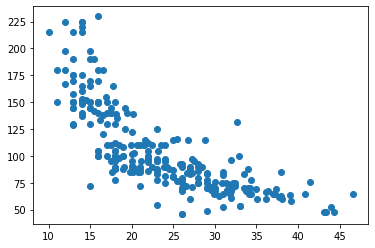

In [7]:
plt.scatter(df['mpg'],df['hp'])

In [8]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [9]:
df.isnull()

,mpg,cylinders,Displacement,hp,weightlbs,time-to-60,year,brand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
256,False,False,False,False,False,False,False,False
257,False,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False,False
259,False,False,False,False,False,False,False,False


In [10]:
df.fillna(0)

,mpg,cylinders,Displacement,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US
1,31.9,4,89,71,1925,14,1980,Europe
2,17.0,8,302,140,3449,11,1971,US
3,15.0,8,400,150,3761,10,1971,US
4,30.5,4,98,63,2051,17,1978,US
...,...,...,...,...,...,...,...,...
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.
259,18.0,6,232,100,3288,16,1972,US.


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['brand'] = encoder.fit_transform(df['brand'])

In [12]:
from sklearn.cluster import KMeans

In [13]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [14]:
y_predicted = km.fit_predict(df[['mpg','hp']])
y_predicted

array([3, 1, 3, 3, 1, 3, 3, 2, 1, 1, 1, 1, 3, 2, 0, 3, 1, 3, 0, 0, 1, 0,
       1, 3, 1, 1, 1, 3, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 0, 0,
       2, 1, 3, 0, 1, 0, 3, 1, 3, 1, 2, 2, 0, 1, 1, 2, 0, 0, 3, 1, 3, 0,
       1, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 3, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 3, 0, 3, 3, 1, 1, 1, 0, 1, 1, 0, 3,
       0, 0, 3, 1, 1, 0, 0, 0, 1, 2, 0, 1, 3, 0, 1, 1, 3, 1, 0, 1, 1, 0,
       2, 3, 3, 3, 1, 3, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 3, 3, 1, 0, 2, 1,
       0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 1, 0, 0, 1,
       2, 3, 3, 1, 0, 1, 3, 3, 0, 0, 0, 3, 3, 2, 0, 0, 2, 3, 3, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 2, 1, 0, 3, 0, 0, 3, 1, 1, 0, 0, 1, 3, 0, 3,
       0, 0, 3, 0, 3, 1, 2, 1, 0, 0, 3, 1, 1, 3, 0, 1, 3, 0, 1, 0, 3, 0,
       2, 0, 2, 3, 3, 1, 1, 0, 1, 0, 1, 3, 0, 0, 3, 1, 0, 0, 0])

In [15]:
df['brand'] = y_predicted
df.head()

,mpg,cylinders,Displacement,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,3
1,31.9,4,89,71,1925,14,1980,1
2,17.0,8,302,140,3449,11,1971,3
3,15.0,8,400,150,3761,10,1971,3
4,30.5,4,98,63,2051,17,1978,1


In [16]:
df['brand'].value_counts()

0    101
1     82
3     58
2     20
Name: brand, dtype: int64

In [17]:
# converting 'mpg' from float to int
df['mpg'] = df['mpg'].astype(int)
  
# displaying the datatypes
display(df.dtypes)

mpg              int32
cylinders        int64
Displacement    object
hp               int64
weightlbs       object
time-to-60       int64
year             int64
brand            int32
dtype: object

In [18]:
x = df.drop(columns=['brand'], axis=1)
y = df['brand']

In [19]:
x.head()

,mpg,cylinders,Displacement,hp,weightlbs,time-to-60,year
0,14,8,350,165,4209,12,1972
1,31,4,89,71,1925,14,1980
2,17,8,302,140,3449,11,1971
3,15,8,400,150,3761,10,1971
4,30,4,98,63,2051,17,1978


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


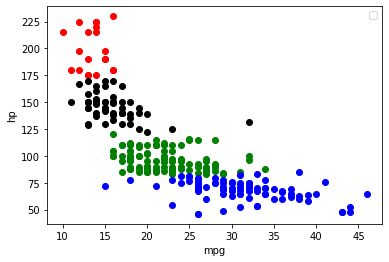

In [20]:
df1 = df[df.brand==0]
df2 = df[df.brand==1]
df3 = df[df.brand==2]
df4 = df[df.brand==3]
 

plt.scatter(df1.mpg,df1['hp'],color='green')
plt.scatter(df2.mpg,df2['hp'],color='blue')
plt.scatter(df3.mpg,df3['hp'],color='red')
plt.scatter(df4.mpg,df4['hp'],color='black')
 

plt.xlabel('mpg')
plt.ylabel('hp')
plt.legend()

In [21]:
df.shape

(261, 8)

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler =MinMaxScaler()
scaler.fit(df[['mpg']])
df['mpg'] = scaler.transform(df[['mpg']])
df.head()

,mpg,cylinders,Displacement,hp,weightlbs,time-to-60,year,brand
0,0.111111,8,350,165,4209,12,1972,3
1,0.583333,4,89,71,1925,14,1980,1
2,0.194444,8,302,140,3449,11,1971,3
3,0.138889,8,400,150,3761,10,1971,3
4,0.555556,4,98,63,2051,17,1978,1


In [24]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['mpg','hp']])
y_predicted

array([1, 0, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 3, 2, 1, 0, 1, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       3, 0, 1, 2, 0, 2, 1, 0, 1, 0, 3, 3, 2, 2, 0, 3, 2, 2, 1, 0, 1, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 1, 2, 0, 0, 2, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2,
       3, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 2, 3, 0,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 0,
       3, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 3, 2, 2, 3, 1, 1, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 0, 3, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 2, 1,
       2, 2, 1, 2, 1, 0, 3, 0, 2, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2,
       3, 2, 3, 1, 1, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2])

In [25]:
df['brand'] = y_predicted
df.head()

,mpg,cylinders,Displacement,hp,weightlbs,time-to-60,year,brand
0,0.111111,8,350,165,4209,12,1972,1
1,0.583333,4,89,71,1925,14,1980,0
2,0.194444,8,302,140,3449,11,1971,1
3,0.138889,8,400,150,3761,10,1971,1
4,0.555556,4,98,63,2051,17,1978,0


In [26]:
km.cluster_centers_

array([[5.90365682e-01, 6.73164557e+01],
       [1.60440613e-01, 1.46086207e+02],
       [3.48023504e-01, 9.60384615e+01],
       [1.00000000e-01, 1.99050000e+02]])

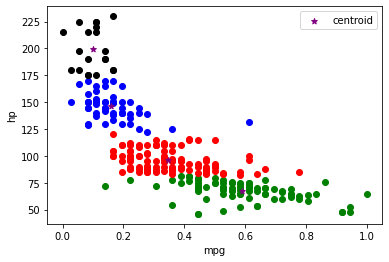

In [27]:
df1 = df[df.brand==0]
df2 = df[df.brand==1]
df3 = df[df.brand==2]
df4 = df[df.brand==3]
 

plt.scatter(df1.mpg,df1['hp'],color='green')
plt.scatter(df2.mpg,df2['hp'],color='blue')
plt.scatter(df3.mpg,df3['hp'],color='red')
plt.scatter(df4.mpg,df4['hp'],color='black')
 

plt.xlabel('mpg')
plt.ylabel('hp')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker='*',label='centroid')
plt.legend()

# Elbow Plot Method

# km.inertia:-
* Inertia measures how well a dataset was clustered by K-Means.
* It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
* A good model is one with low inertia AND a low number of clusters ( K )

In [28]:
# The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid.
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['mpg','hp']])
    sse.append(km.inertia_)

In [29]:
sse

[426476.22733669163,
 110356.4338821491,
 66299.48125518886,
 31598.666486508715,
 22502.19563838015,
 14265.63363706771,
 10591.395127147178,
 8118.797021509534,
 6253.519916127812]

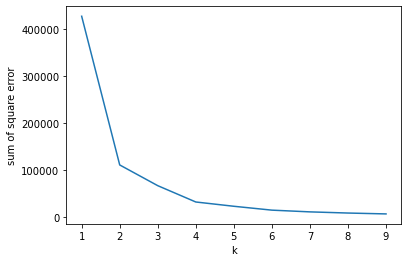

In [30]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse)

# 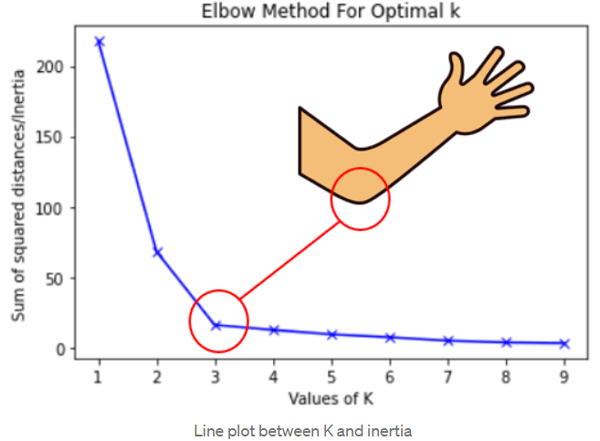